In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os

In [59]:
def file_name(file_dir):   
    L=[]
    files = []
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == '.csv':  
                L.append(os.path.join(root, file))
    return L      

def str2ts(str_time): 
    format_dt = "%Y-%m-%d %H:%M:%S" 
    return int(time.mktime(time.strptime(str_time,format_dt)))

def ts2dt(ts):
    return datetime.datetime.fromtimestamp(ts)
# timestamp to time
def ts2time(ts):
    return time.localtime(ts)

def trans_csv(file_path):
    df = pd.read_csv(file_path, sep=',')
    df['timestamp'] = df.timestamp.apply(str2ts)
    df.to_csv(file_path,index=False)

In [39]:
files = file_name("/Users/shijia/project/my_bupt/NAB-master/data")
for file in files:
    trans_csv(file)

In [63]:
df = pd.read_csv("./data/art_daily_small_noise.csv",sep=',')
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('timestamp',inplace=True)

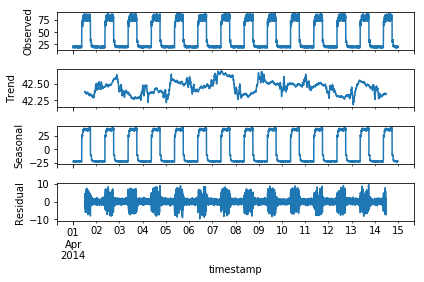

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,freq=24*12)
decomposition.plot()
plt.show()